# Summarise a univariate categorical dataset

> *The best way to summarize categorical data is to use frequencies and percentages.*
>
> (1.3 Summarizing One Qualitative Variable, [Stat500](https://online.stat.psu.edu/stat500/lesson/1/1.3))

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Get things ready

Set the graphing theme.

In [2]:
sns.set_theme()

Load the dataset and select the variable of interest.

In [3]:
bwages: pd.DataFrame = sm.datasets.get_rdataset("Bwages", "Ecdat")

Select the variable of interest and transform.
Data are ordinal, so we *sort* then *map* the data.

In [4]:
def map_educ(d: int) -> str:
    return {1: "low", 2: "low-med", 3: "med", 4: "med-high", 5: "high"}[d]


X = bwages.data["educ"].sort_values().map(map_educ)
X.sample(5, random_state=23).sort_index()


499          med
782          med
804     med-high
1087    med-high
1242        high
Name: educ, dtype: object

## Numerical summaries

### Count of total observations

In [5]:
X.value_counts()

educ
med         420
med-high    356
high        332
low-med     265
low          99
Name: count, dtype: int64

### Proportion of total observations

In [6]:
X.value_counts(normalize=True)

educ
med         0.285326
med-high    0.241848
high        0.225543
low-med     0.180027
low         0.067255
Name: proportion, dtype: float64

### Factor, count, and percentage of total observations

In [7]:
pd.DataFrame().assign(
    count=X.value_counts(), percentage=X.value_counts(normalize=True) * 100
)

,count,percentage
educ,,
med,420,28.532609
med-high,356,24.184783
high,332,22.554348
low-med,265,18.002717
low,99,6.725543


## Visualisations

(*Seaborn* prefers a `DataFrame`, so we pipe the `Series` into a `DataFrame` before plotting.)

### Eductation level by count

<AxesSubplot: xlabel='educ', ylabel='count'>

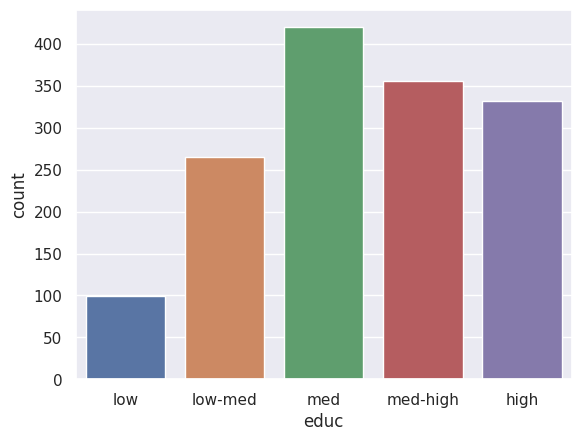

In [8]:
X.to_frame().pipe(sns.countplot, x="educ")

### Percentage education by count

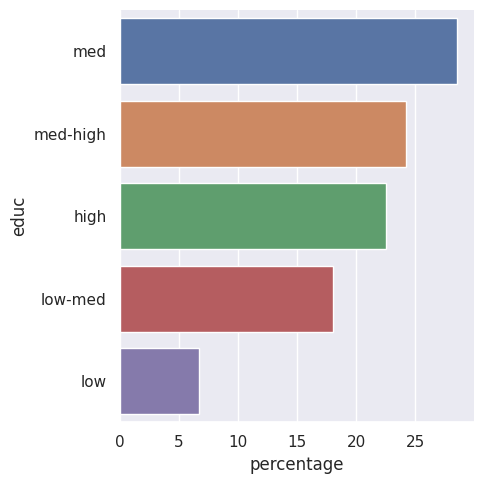

In [9]:
X.value_counts(normalize=True).mul(100).rename("percentage").reset_index().pipe(
    sns.catplot, x="percentage", y="educ", kind="bar"
)